In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

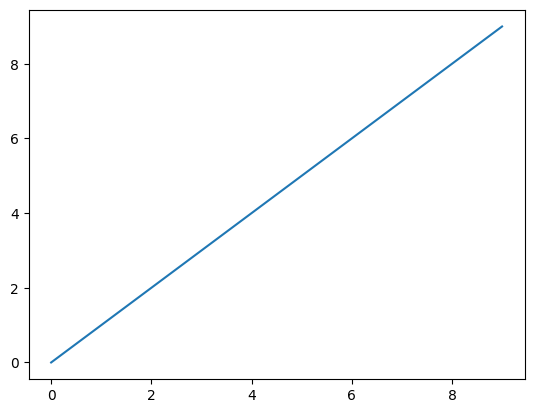

In [2]:
data = np.arange(10)
plt.plot(data)

## Figures and Subplots

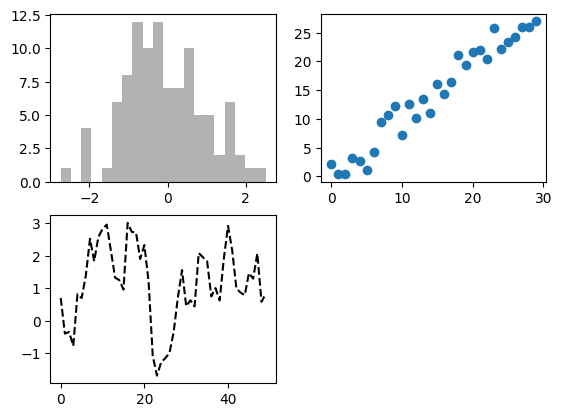

In [16]:
# plt.figure has a number of options; notably, figsize will guarantee the figure 
# has a certain size and aspect ratio if saved to disk.
# Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

fig = plt.figure() # <Figure size 640x480 with 0 Axes>

# You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:
ax1 = fig.add_subplot(2, 2, 1)
# This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
# selecting the first of four subplots (numbered from 1).
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.

_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# <matplotlib.collections.PathCollection at 0x21321eda610>

In [ ]:
# Creating a figure with a grid of subplots is a very common task, so matplotlib
# includes a convenience method, plt.subplots, that creates a new figure and returns
# a NumPy array containing the created subplot objects:
fig, axes = plt.subplots(2, 3)
axes

# This is very useful, as the axes array can be easily indexed like a two-dimensional
# array; for example, axes[0, 1]. You can also indicate that subplots should have the
# same x- or y-axis using sharex and sharey, respectively. This is especially useful
# when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot
# limits independently. See Table 9-1 for more on this method.

Argument        Description

nrows           Number of rows of subplots

ncols           Number of columns of subplots

sharex All      subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)

sharey All      subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)

subplot_kw      Dict of keywords passed to add_subplot call used to create each subplot

**fig_kw        Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2,figsize=(8, 6))

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation.

### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the subplots_adjust method on Figure objects, also avail‐
able as a top-level function:

subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respec‐
tively, to use as spacing between subplots. Here is a small example where I shrink the
spacing all the way to zero (see Figure 9-5):

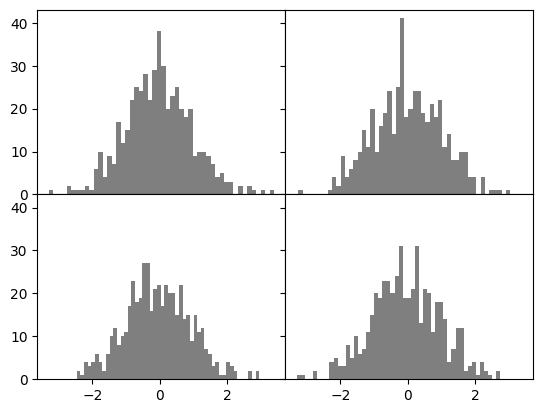

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the
labels overlap, so in a case like this you would need to fix the labels yourself by speci‐
fying explicit tick locations and tick labels (we’ll look at how to do this in the follow‐
ing sections).

## Colors, Markers, and Line Styles

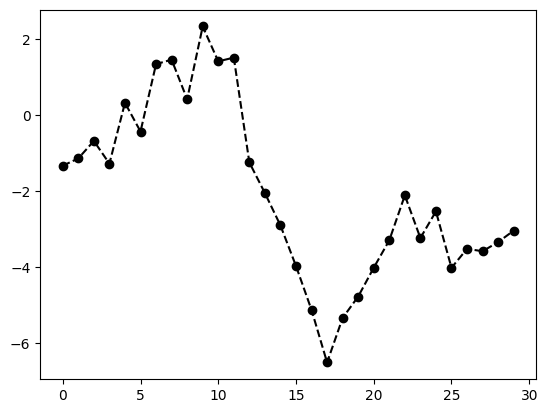

In [20]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [21]:
# This could also have been written more explicitly as:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

NameError: name 'plot' is not defined

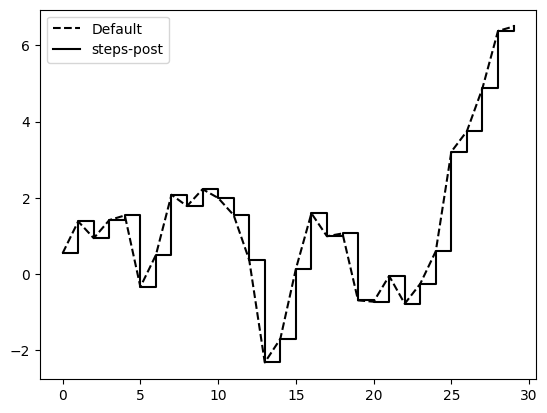

In [29]:
# For line plots, you will notice that subsequent points are linearly interpolated by default.
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

You may notice output like <matplotlib.lines.Line2D at ...> when you run this.
matplotlib returns objects that reference the plot subcomponent that was just added.
A lot of the time you can safely ignore this output. Here, since we passed the label
arguments to plot, we are able to create a plot legend to identify each line using
plt.legend.

You must call plt.legend (or ax.legend, if you have a reference to
the axes) to create the legend, whether or not you passed the label
options when plotting the data.

## Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

• Called with no arguments returns the current parameter value (e.g., plt.xlim()
returns the current x-axis plotting range)

• Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets
the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of
them corresponds to two methods on the subplot object itself; in the case of xlim
these are ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods
myself in the interest of being explicit (and especially when working with multiple
subplots), but you can certainly use whichever you find more convenient.

### Setting the title, axis labels, ticks, and ticklabels

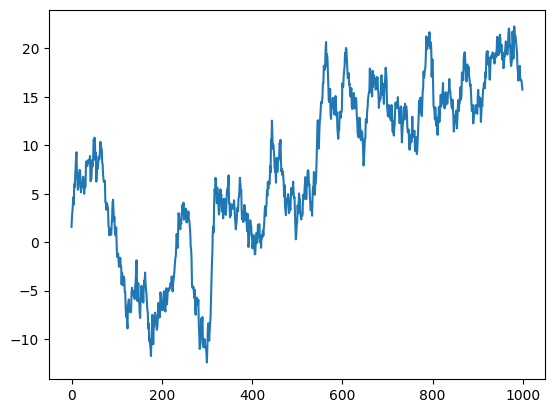

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())


To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels. But we can set any other values as the labels
using set_xticklabels:

Text(0.5, 0, 'Stages')

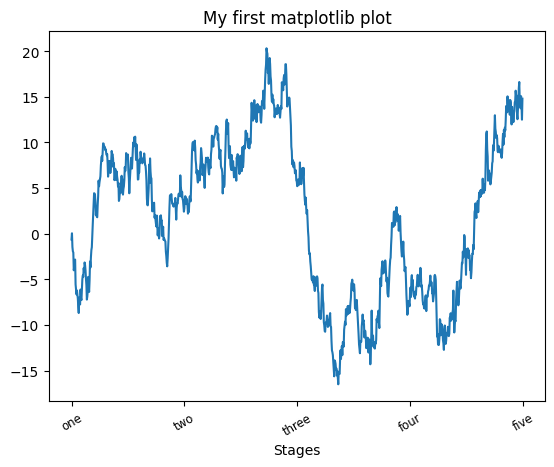

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')

# The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel
# gives a name to the x-axis and set_title the subplot title

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')



Modifying the y-axis consists of the same process, substituting y for x in the above.
The axes class has a set method that allows batch setting of plot properties. From the
prior example, we could also have written:

props = {
    
        'title': 'My first matplotlib plot',

        'xlabel': 'Stages'

}

ax.set(**props)

### Adding legends

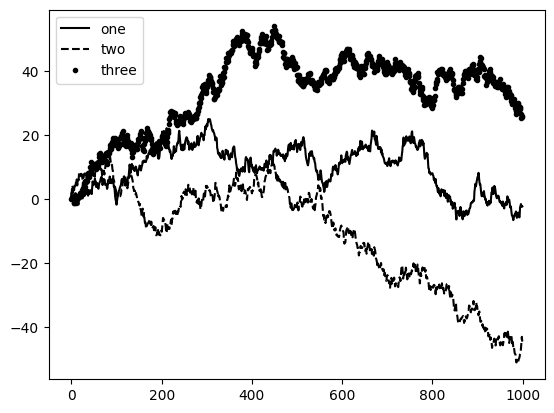

In [28]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

# Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically create a legend.
ax.legend(loc='best')

The legend method has several other choices for the location loc argument. See the
docstring (with ax.legend?) for more information.

The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good
option, as it will choose a location that is most out of the way. To exclude one or more
elements from the legend, pass no label or label='_nolegend_'.

## Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annota‐
tions, which could consist of text, arrows, or other shapes. You can add annotations
and text using the text, arrow, and annotate functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling:

ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)

Annotations can draw both text and arrows arranged appropriately. As an example,
let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008–2009 financial crisis.
You can most easily reproduce this code example in a single cell in a Jupyter note‐
book. See Figure 9-11 for the result:

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

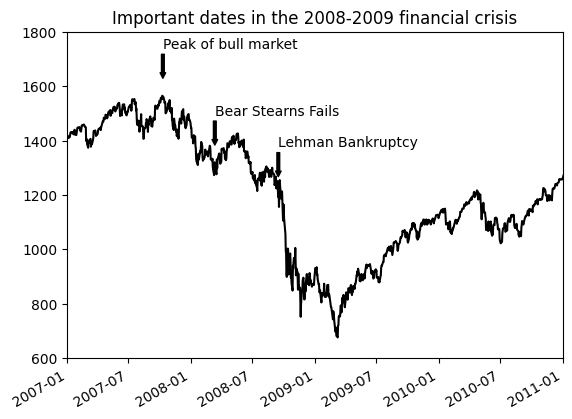

In [30]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
(datetime(2008, 3, 12), 'Bear Stearns Fails'),
(datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),xytext=(date, spx.asof(date) + 225),
    arrowprops=dict(facecolor='black', headwidth=4, width=2,
    headlength=4),
    horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

There are a couple of important points to highlight in this plot: the ax.annotate
method can draw labels at the indicated x and y coordinates. We use the set_xlim
and set_ylim methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the
plot.

See the online matplotlib gallery for many more annotation examples to learn from.

Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle, are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

To add a shape to a plot, you create the patch object shp and add it to a subplot by
calling ax.add_patch(shp) (see Figure 9-12):

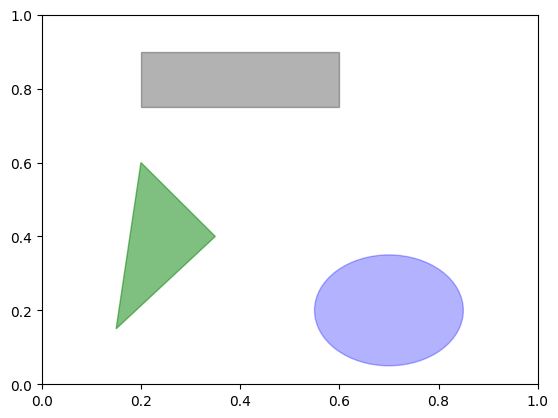

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

If you look at the implementation of many familiar plot types, you will see that they
are assembled from patches.

## Saving Plots to File

You can save the active figure to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method. For example, to save an SVG version of a
figure, you need only type:

plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead, you
would get a PDF. There are a couple of important options that I use frequently for
publishing graphics: dpi, which controls the dots-per-inch resolution, and
bbox_inches, which can trim the whitespace around the actual figure. To get the
same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a
BytesIO:

In [32]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 640x480 with 0 Axes>

See Table 9-2 for a list of some other options for savefig.

Table 9-2. Figure.savefig options

Argument                    Description

fname                       String containing a filepath or a Python file-like object. 
                            The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG)

dpi                         The figure resolution in dots per inch; defaults to 100 out of the box but can be configured

facecolor, edgecolor        The color of the figure background outside of the subplots; 'w' (white), by default 

format                      The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)

bbox_inches                 The portion of the figure to save; if 'tight' is passed, 
                            will attempt to trim the empty space around the figure

## matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primar‐
ily toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the
configuration programmatically from Python is to use the rc method; for example, to
set the global default figure size to be 10 × 10, you could enter:

plt.rc('figure', figsize=(10, 10))

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. An easy way to write
down the options in your program is as a dict:

font_options = {'family' : 'monospace',
'weight' : 'bold',
'size' : 'small'}
plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes
with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you cus‐
tomize this file and place it in your home directory titled .matplotlibrc, it will be
loaded each time you use matplotlib.

As we’ll see in the next section, the seaborn package has several built-in plot themes
or styles that use matplotlib’s configuration system internally.